In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

# Задача 1

Дана матрица Х с положительными числами размерности 7 на 5. Нормализуйте строки в этой матрице, т.е. сделайте так, чтобы сумма элементов каждой строки равнялась 1, при этом соотношения между элементами строки сохранились (при делении одного элемента на другой до и после нормализации получится одно и то же число). Сохраните полученную матрицу в файл в бинарном виде.

In [2]:
x = np.array([np.linspace(1, i + 2, 5) for i in range(7)])
print(x)
print(x.shape)

[[1.   1.25 1.5  1.75 2.  ]
 [1.   1.5  2.   2.5  3.  ]
 [1.   1.75 2.5  3.25 4.  ]
 [1.   2.   3.   4.   5.  ]
 [1.   2.25 3.5  4.75 6.  ]
 [1.   2.5  4.   5.5  7.  ]
 [1.   2.75 4.5  6.25 8.  ]]
(7, 5)


**Решение**

In [3]:
x_norm = (x.T / x.sum(axis=1)).T

test1 = (np.rint(x_norm.sum(axis=1)) == 1).all()
print(f'Сумма элементов каждой строки равна единице: {test1}')

test2 = x[0,0] / x[0,1] == x_norm[0,0] / x_norm[0,1]
print(f'Отношения между элементами строки сохранены: {test2}')

np.save('hw_pro_1', x_norm)

Сумма элементов каждой строки равна единице: True
Отношения между элементами строки сохранены: True


# Задача 2

Двумерная матрица X хранит информацию о результатах прохождения теста студентами. Элемент X[i, j] равен 1 если i-ый студент правильно решил j-ую задачу, если он решил ее неправильно, элемент будет равен 0. За каждую правильно решенную задачу начисляется 1 балл. Тест считается пройденным, если студент набрал больше 6 баллов. Посчитайте кол-во студентов, сдавших тест.

In [4]:
x = (np.random.rand(7, 10) > 0.3).astype(int)
print(x)

[[1 0 1 1 1 0 0 1 0 1]
 [0 1 1 0 1 0 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 0]
 [1 0 1 1 0 1 1 0 0 1]
 [1 1 1 0 1 1 1 0 0 0]
 [1 0 1 1 1 1 1 1 1 0]]


**Решение**

In [5]:
passed = x.sum(axis=1) > 6
print(passed.sum())

3


# Задача 3

Создайте трехмерный массив, который будет формировать изображение синего квадрата на белом фоне, расположенного в центре изображения. Длина и ширина изображения должна быть равна 12. Выведите этот массив с помощью функции imshow из библиотеки matplotlib. Должно получиться примерно следующее изображение:

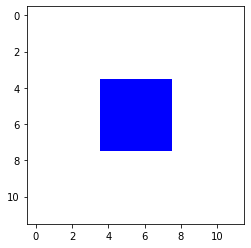

**Решение**

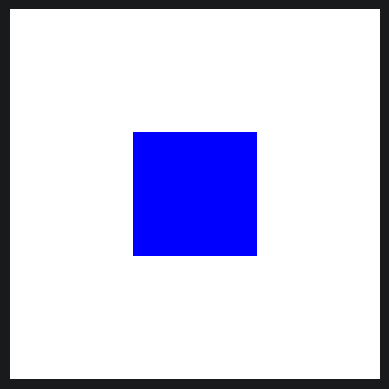

In [6]:
result = np.array([[[255, 255, 255] for _ in range(12)] for _ in range(12)])
blue_square = np.array([[[0, 0, 255] for _ in range(4)] for _ in range(4)])
result[4:8, 4:8] = blue_square

plt.style.use('.\images\jupyter.mplstyle')

plt.axis('off')
plt.imshow(result)

# Задача 4

Найдите минимум функции f(x) с помощью функции fmin_bfgs из scipy и отобразите как происходил процесс оптимизации. Для этого в функцию fmin_bfgs нужно передать параметр retall=True, тогда ее вызов вернет в том числе поле со списком лучших найденных аргументов функции на каждой из итераций. Выведите соответствующие точки на графике функции. Должен получиться примерно следующий график:

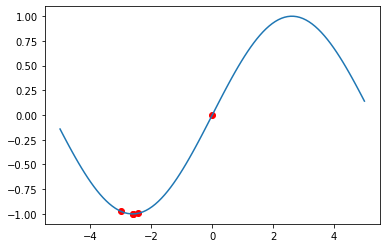

In [7]:
def f(x):
    return np.sin(0.6 * x)

**Решение**

In [8]:
from scipy.optimize import fmin_bfgs

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 4
         Function evaluations: 10
         Gradient evaluations: 5


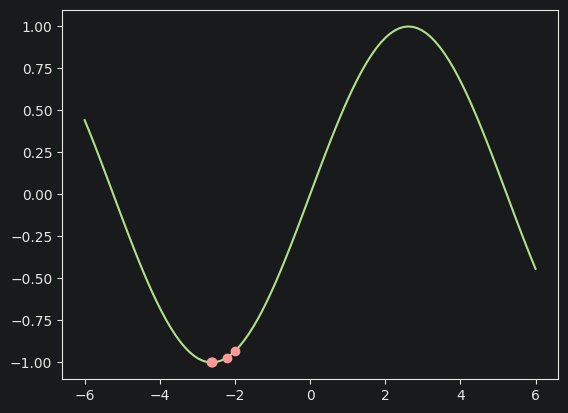

In [9]:
x = np.linspace(-6, 6, 100)

points = fmin_bfgs(f, -2, retall=True)
points = np.concatenate(points[1])

plt.style.use('.\images\jupyter.mplstyle')

plt.plot(x, f(x))
plt.plot(points, f(points), marker='o', ls='')

# Задача 5

Сгенерируйте гармонический сигнал (синусоиду) с амплитудой 2. Ограничьте амплитуду сигнала по модулю значением 1. Визуализируйте оба сигнала на графике. Постройте спектры частот для обоих сигналов (Вам понадобится функция для быстрого преобразования Фурье), выведите их на одном графике и сравните. Должны получиться следующие графики:

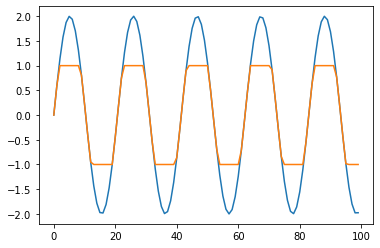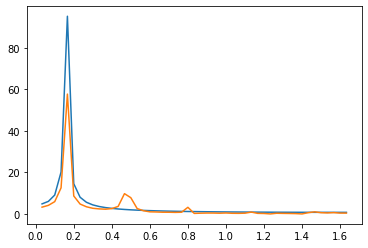

Для решения задачи понадобится функция np.clip:

In [10]:
arr = np.array([-3, -2, -1, 0, 1, 2, 3])
np.clip(arr, -2, 2)

array([-2, -2, -1,  0,  1,  2,  2])

**Решение**

In [11]:
def f(x):
    return 2*np.sin(0.3*x)

In [12]:
from scipy.fftpack import fft

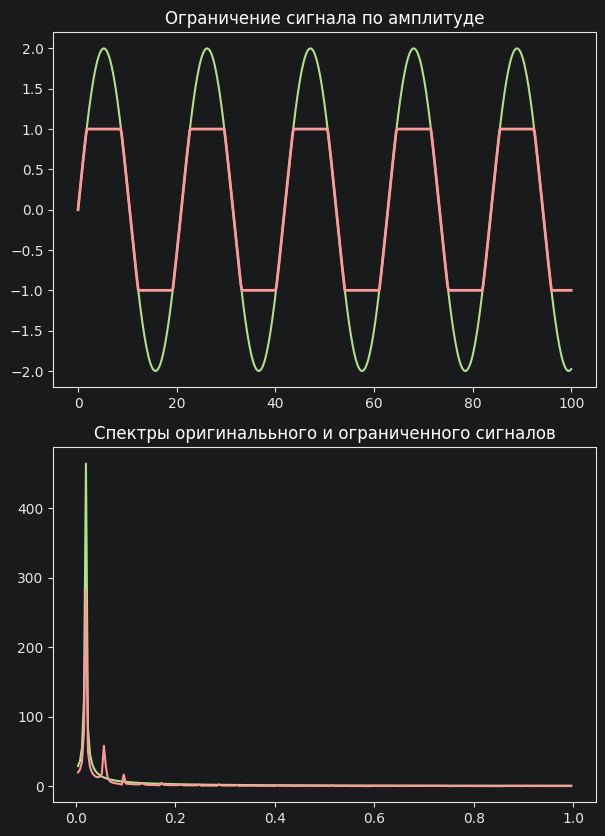

In [13]:
x = np.linspace(0, 100, 500)
y = f(x)
y_clipped = np.clip(y, -1, 1)

plt.style.use('.\images\jupyter.mplstyle')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7,10))
fig.subplots_adjust(hspace=0.17)

ax1.set_title('Ограничение сигнала по амплитуде')
ax1.plot(x, y)
ax1.plot(x, y_clipped, linewidth=2)

x_fft = np.fft.fftfreq(len(y), 0.5)
y_fft = abs(fft(y))
y_clipped_fft = abs(fft(y_clipped))

indices = np.where(x_fft > 0)
x_fft_positive = x_fft[indices]
y_fft_positive = y_fft[indices]
y_clipped_fft_positive = y_clipped_fft[indices]

ax2.set_title('Спектры оригиналььного и ограниченного сигналов')
ax2.plot(x_fft_positive, y_fft_positive)
ax2.plot(x_fft_positive, y_clipped_fft_positive)